In [1]:
import warnings 
warnings.simplefilter("ignore")

import os 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import kurtosis


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix


import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
colnames=['id', 'clump_thick', 'cell_size', 'cell_shape', 'adhesion', 'epithelial_size', 'bare_nuclei', 'bland_chromatin', 'nucleoli', 'mitoses', 'diagnosis'] 
breast_cancer_data = pd.read_csv("breast-cancer-wisconsin.csv", names=colnames, header=None)

In [3]:
breast_cancer_data.columns

Index(['id', 'clump_thick', 'cell_size', 'cell_shape', 'adhesion',
       'epithelial_size', 'bare_nuclei', 'bland_chromatin', 'nucleoli',
       'mitoses', 'diagnosis'],
      dtype='object')

In [4]:
breast_cancer_data.head()

,id,clump_thick,cell_size,cell_shape,adhesion,epithelial_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Initial Analysis

In [5]:
def initial_analysis(df):
    """
    Given a dataframe produces a simple report on initial data analytics
    Params:
        - df 
    Returns:
        - Shape of dataframe records and columns
        - Columns and data types
    """
    print('Report of Initial Data Analysis:\n')
    print(f'Shape of dataframe: {df.shape}')
    print(f'Features and Data Types: \n {df.dtypes}')

In [6]:
def percent_missing(df):
    """
    Given a dataframe it calculates the percentage of missing records per column
    Params:
        - df
    Returns:
        - Dictionary of column name and percentage of missing records
    """
    col=list(df.columns)
    perc=[round(df[c].isna().mean()*100,2) for c in col]
    miss_dict=dict(zip(col,perc))
    return miss_dict

In [7]:
#Data properties 

initial_analysis(breast_cancer_data)

Report of Initial Data Analysis:

Shape of dataframe: (699, 11)
Features and Data Types: 
 id                  int64
clump_thick         int64
cell_size           int64
cell_shape          int64
adhesion            int64
epithelial_size     int64
bare_nuclei        object
bland_chromatin     int64
nucleoli            int64
mitoses             int64
diagnosis           int64
dtype: object


In [8]:
patternDel = "[?]"
filter = breast_cancer_data["bare_nuclei"].str.contains(patternDel)

breast_cancer_data = breast_cancer_data[~filter]

breast_cancer_data["bare_nuclei"] = breast_cancer_data["bare_nuclei"].astype(np.int64)
initial_analysis(breast_cancer_data)



Report of Initial Data Analysis:

Shape of dataframe: (683, 11)
Features and Data Types: 
 id                 int64
clump_thick        int64
cell_size          int64
cell_shape         int64
adhesion           int64
epithelial_size    int64
bare_nuclei        int64
bland_chromatin    int64
nucleoli           int64
mitoses            int64
diagnosis          int64
dtype: object


In [9]:
percent_missing(breast_cancer_data)

{'id': 0.0,
 'clump_thick': 0.0,
 'cell_size': 0.0,
 'cell_shape': 0.0,
 'adhesion': 0.0,
 'epithelial_size': 0.0,
 'bare_nuclei': 0.0,
 'bland_chromatin': 0.0,
 'nucleoli': 0.0,
 'mitoses': 0.0,
 'diagnosis': 0.0}

In [10]:
breast_cancer_data.describe()

,id,clump_thick,cell_size,cell_shape,adhesion,epithelial_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,diagnosis
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


- We have nine features (excluding ID) and one target value (i.e. "class"); number of datapoints is 699.

- We don't have any missing values.

- Since all the values are in the range of 1-10, the data do not scaling and normalization

**Type of Problem:** Classification

**Objective:** To predict whether a patient has malignant or benign cancer.

**Features:** adhesion, bare_nuclei, bland_chromatin, cell_shape, cell_size, clump, thick, epithelial_size, mitoses, nucleoli

**Target:** diagnosis

## Exploratory Analysis

In [11]:
M = breast_cancer_data[(breast_cancer_data['diagnosis'] != 2)]
B = breast_cancer_data[(breast_cancer_data['diagnosis'] == 2)]

In [12]:
trace = go.Pie(labels = ['benign','malignant'], values = breast_cancer_data['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'yellow'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)


Although we find that data is not completely balanced. For initial analysis, I would like to see how this dataset works. If the performance is poor then I would balance the data using either oversamplig, undersampling or SMOTE.

## Data Pre-processing

Since the pre-processing of the data should be carried out on training dataset and then sample function is applied over test dataset. First, I would split the dataset into training and test dataset, then proceed with pre-processing.

In [13]:
breast_cancer_data1 = breast_cancer_data.drop(['id'], axis=1) #drop id since it is not contributing to the analysis

#Train test split 
X = breast_cancer_data1[["clump_thick", "cell_size", "cell_shape","adhesion", "epithelial_size", "bare_nuclei", "bland_chromatin", 'nucleoli', 'mitoses' ]]
y = breast_cancer_data1["diagnosis"]
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=123)
print("Dimension of training dataset_predictors:", x_train.shape)
print("Dimension of test dataset_predictors:", x_test.shape)
print("Length of training_diagnosis:", y_train.shape)
print("Length of test dataset_diagnosis:", y_test.shape)

Dimension of training dataset_predictors: (546, 9)
Dimension of test dataset_predictors: (137, 9)
Length of training_diagnosis: (546,)
Length of test dataset_diagnosis: (137,)


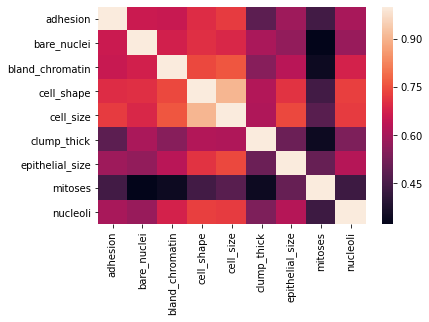

In [14]:
#correlation

data_corr = pd.concat([x_train, y_train])
del data_corr[0]
correlation = data_corr.corr()

sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

We find that cell size and cell shape are highly correlated with each - so, we can consider one of these features.

Also, we can see that cell size and cell shape are highly correlated with diagnosis with the same correlation value of 0.71.

Mitoses is weakly correlated to diagnosis.

## Feature Selection/Extraction

There are many ways to extract the features:

- Removal of highly correlated predictors - Highly subjective according to the analyst. It implies that correlation does not lead to causation.
- Principal Component Analysis - Since the principal components are used as the featues, it does not provide much explainability. Also, there is a loss of information.
- Recursive Feature Elimination/Feature importance using Random Forest - Although there is a loss of information here, variables that have high predictability are selected.

Feature: 0, Score: 0.05052
Feature: 1, Score: 0.22568
Feature: 2, Score: 0.23756
Feature: 3, Score: 0.02209
Feature: 4, Score: 0.09487
Feature: 5, Score: 0.14466
Feature: 6, Score: 0.13742
Feature: 7, Score: 0.07792
Feature: 8, Score: 0.00929


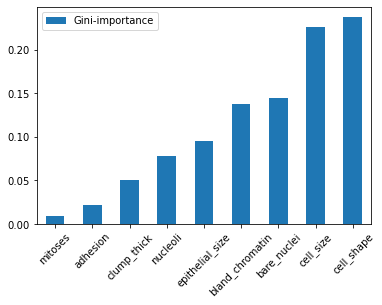

In [15]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

The above plot shows the importance (by Gini index) of all features. We can select four important features. To check whether feature selection helps to improve the accuracy - I would plan to compare it with model using all the features.

## Classification


Starting with linear model for classifications: logistic regression, followed by SVM with linear kernel and random forest.

Log_R
LogisticRegression(random_state=0)
[[88  2]
 [ 0 47]]


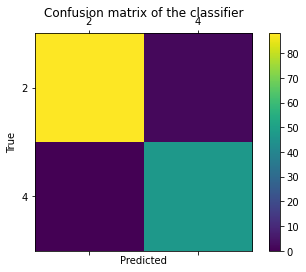

SVM_Linear
SVC(C=0.01, kernel='linear')
[[87  3]
 [ 0 47]]


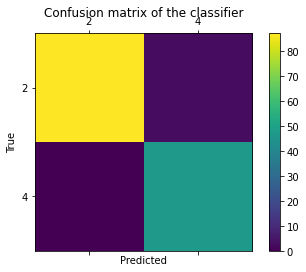

RF
RandomForestClassifier(max_depth=2, random_state=0)
[[87  3]
 [ 0 47]]


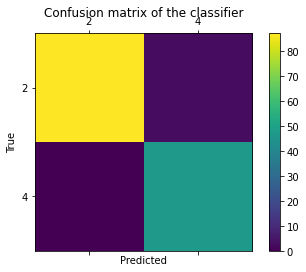

In [16]:
class_names = breast_cancer_data.diagnosis

models_dic={"Log_R": LogisticRegression(random_state=0).fit(x_train, y_train), 
            "SVM_Linear": svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train), 
            "RF": RandomForestClassifier(max_depth=2, random_state=0).fit(x_train, y_train)}


for name, model in models_dic.items():
    pred = model.predict(x_test)
    print(name)
    print(model)
    labels = [2, 4]
    cm = confusion_matrix(y_test, pred, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier') 
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


We don't find much change in the performance measures among all three classifiers using all features.

Log_R
LogisticRegression(random_state=0)
[[88  2]
 [ 0 47]]


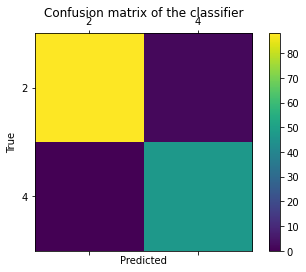

SVM_Linear
SVC(C=0.01, kernel='linear')
[[87  3]
 [ 0 47]]


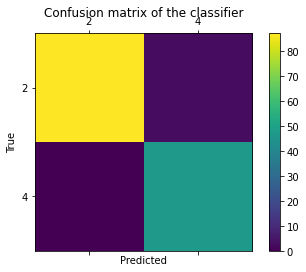

RF
RandomForestClassifier(max_depth=2, random_state=0)
[[87  3]
 [ 0 47]]


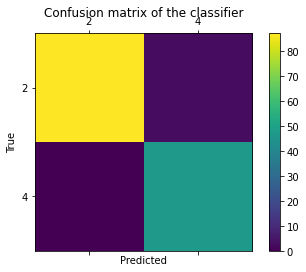

In [17]:
#Selected features 
X_train = x_train[["cell_size", "cell_shape", "bare_nuclei", "bland_chromatin"]]
X_test = x_test[["cell_size", "cell_shape", "bare_nuclei", "bland_chromatin"]]



models_dic={"Log_R": LogisticRegression(random_state=0).fit(x_train, y_train), 
            "SVM_Linear": svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train), 
            "RF": RandomForestClassifier(max_depth=2, random_state=0).fit(x_train, y_train)}


for name, model in models_dic.items():
    pred = model.predict(x_test)
    print(name)
    print(model)
    labels = [2, 4]
    cm = confusion_matrix(y_test, pred, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier') 
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Again, we don't find much difference in the performance measures. It could be because that dataset is small and the model is overfitting. It would be interesting to check the results when it is balanced.